<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


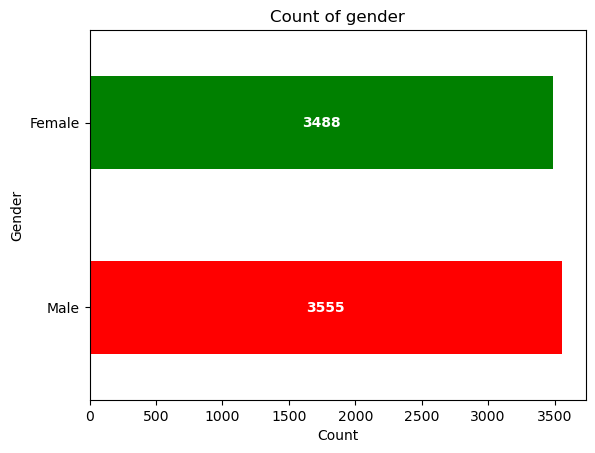

<Figure size 600x400 with 0 Axes>

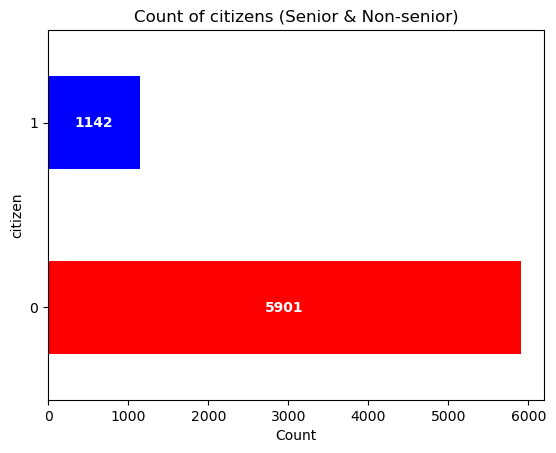

<Figure size 600x400 with 0 Axes>

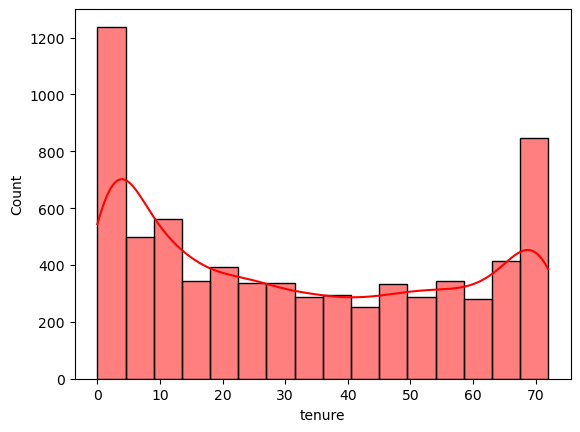

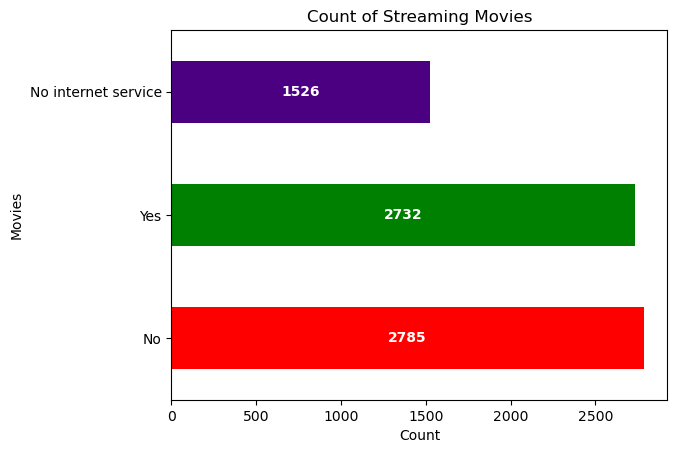

<Figure size 600x400 with 0 Axes>

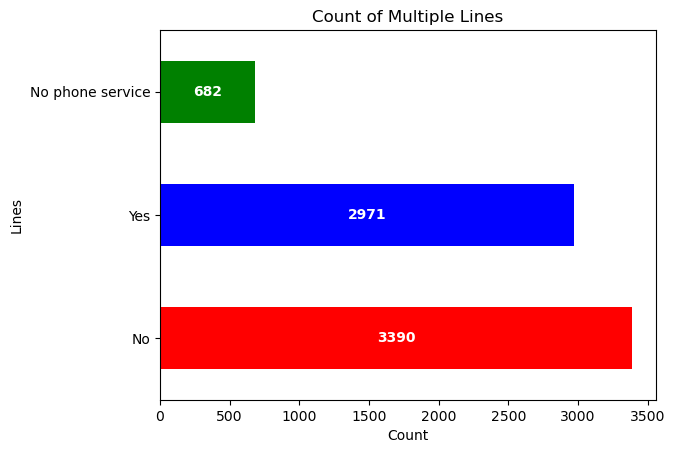

<Figure size 600x400 with 0 Axes>

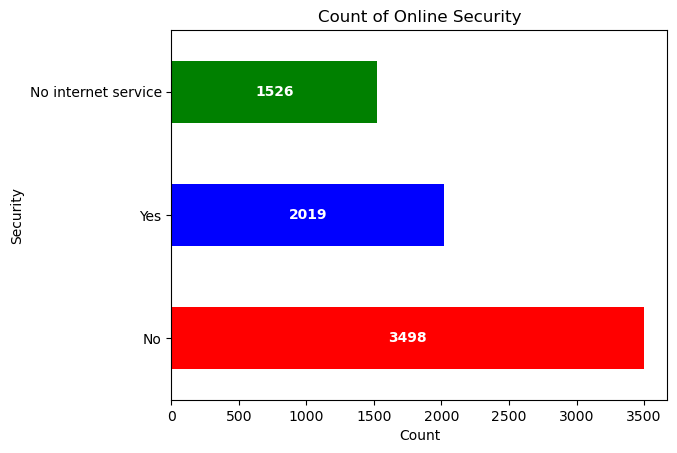

<Figure size 600x400 with 0 Axes>

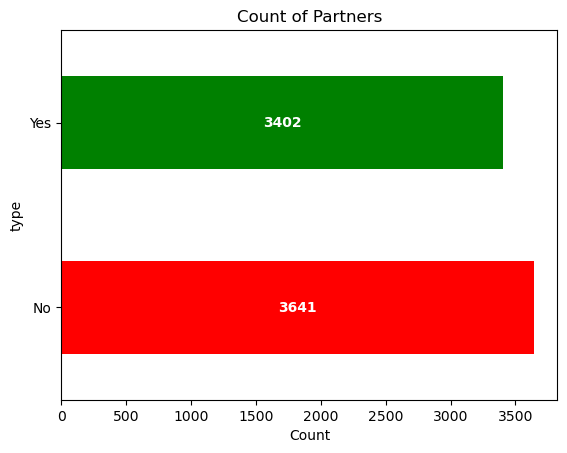

<Figure size 600x400 with 0 Axes>

       Contract     
Churn        No  Yes
gender              
Female     2549  939
Male       2625  930


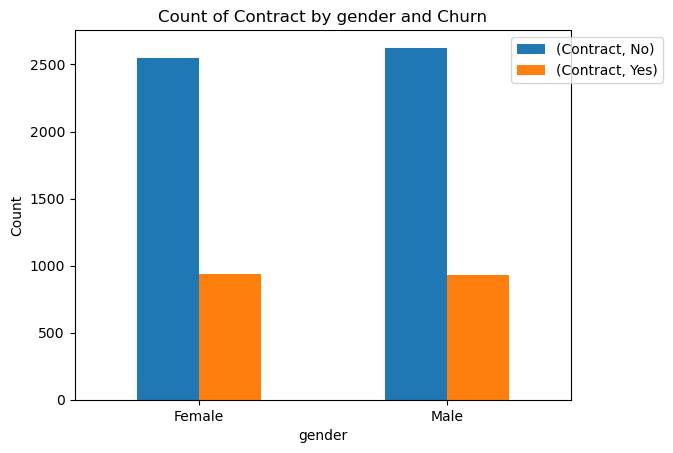

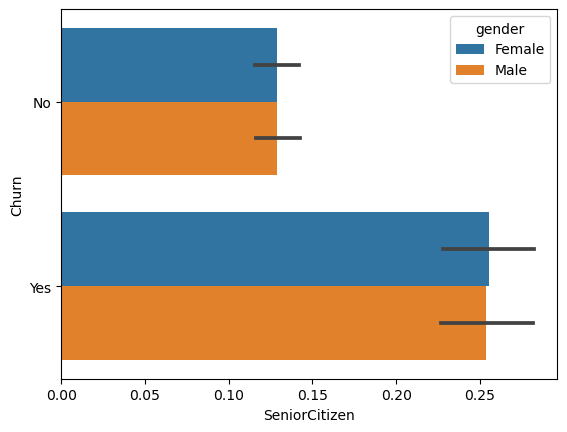

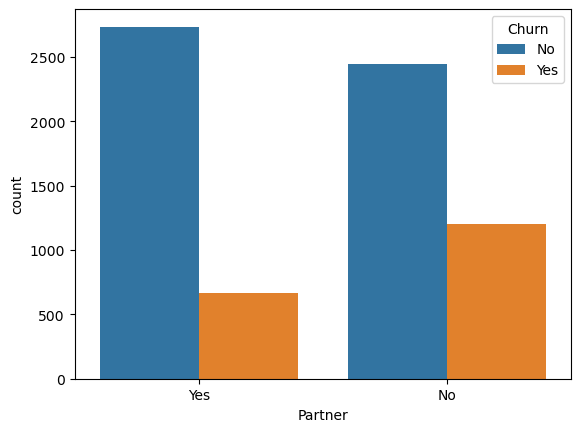

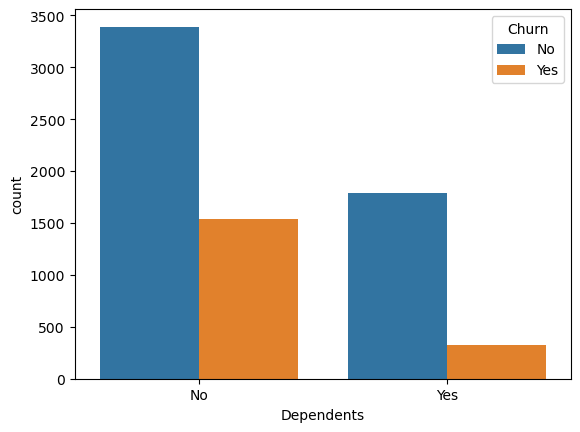

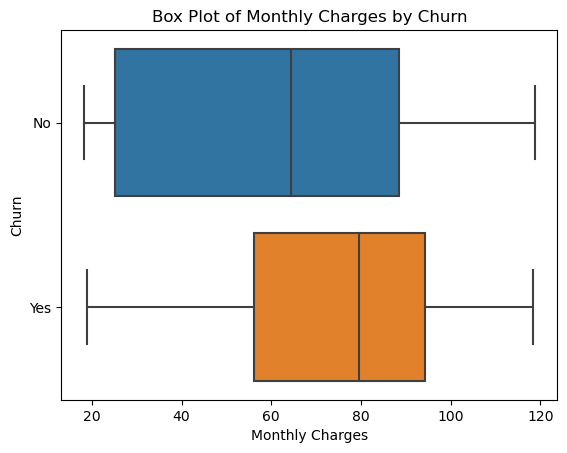

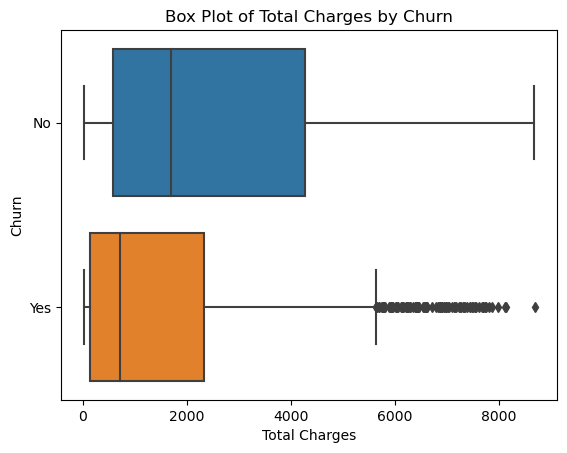

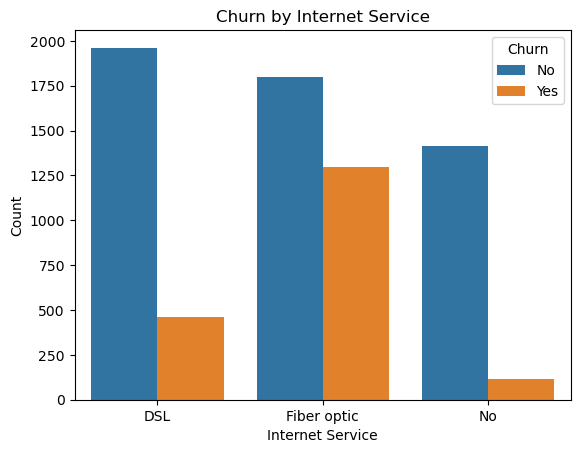

<Figure size 1600x1400 with 0 Axes>

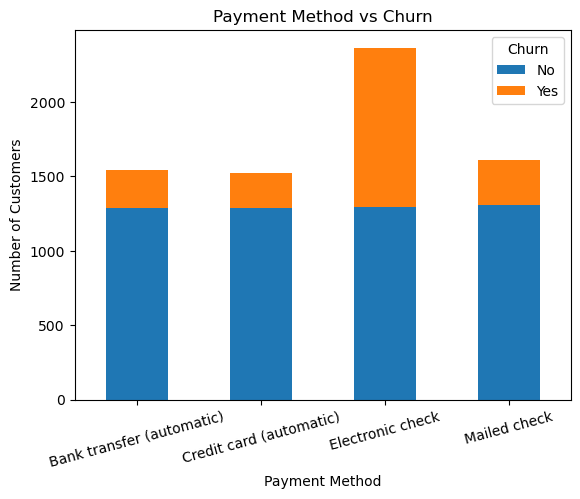

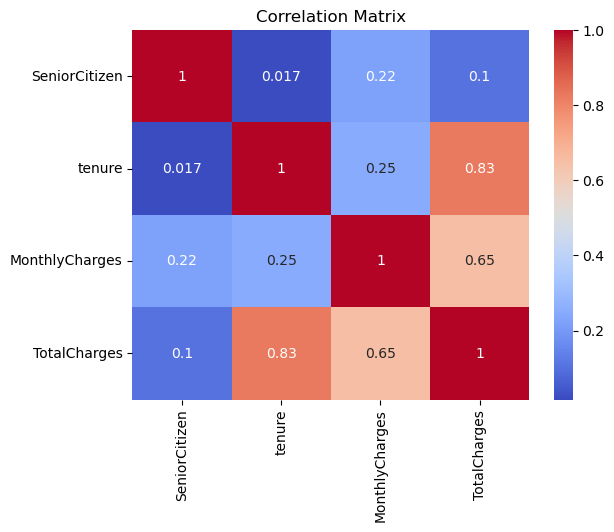

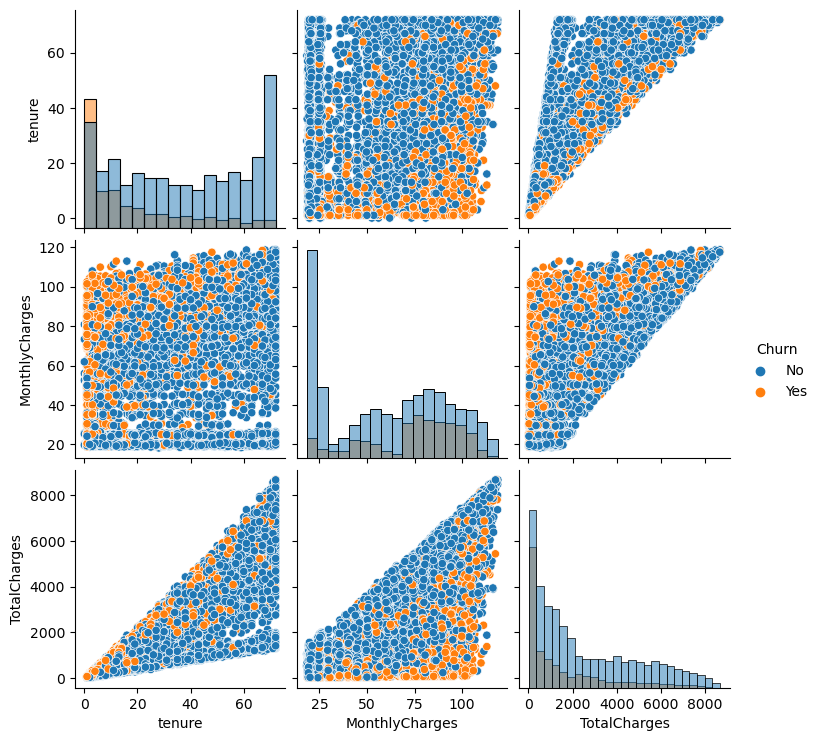

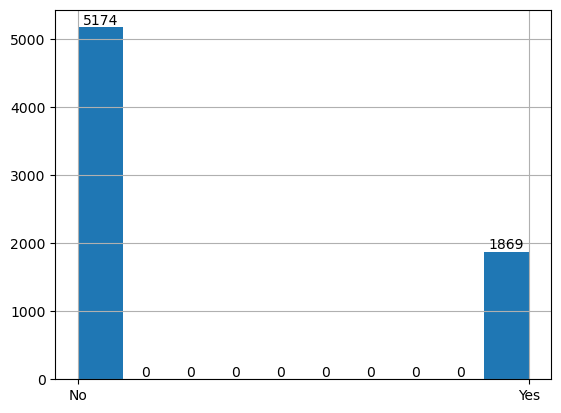

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


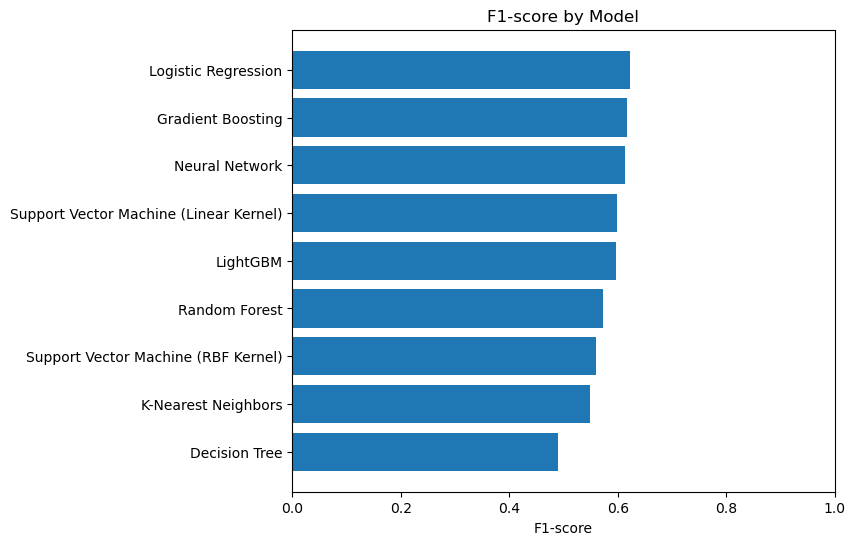

In [1]:
%run MachineLearningModels.ipynb

# Hyperparameter Tuning for Four chosen Models using GridSearchCV

The code below sets up the parameter grids for each model, performs hyperparameter tuning using grid search with cross-validation, and prints the best parameters and best accuracy for each model. Here are the steps:

1. gradient_boosting_params is a dictionary that specifies the hyperparameters and their corresponding values for the Gradient Boosting model. The hyperparameters being tuned here are learning_rate, n_estimators, and max_depth.

2. logistic_regression_params is a dictionary that specifies the hyperparameters and their corresponding values for the Logistic Regression model. The hyperparameters being tuned here are C (inverse of regularization strength) and solver (optimization algorithm).

3. svm_params is a dictionary that specifies the hyperparameters and their corresponding values for the Support Vector Machine (Linear Kernel) model. The hyperparameters being tuned here are C (inverse of regularization strength) and kernel (type of kernel function).

4. neural_network_params is a dictionary that specifies the hyperparameters and their corresponding values for the Neural Network model. The hyperparameters being tuned here are hidden_layer_sizes (sizes of the hidden layers), activation (activation function), and alpha (L2 regularization parameter).

5. The models dictionary contains the models to be tuned along with their respective parameter grids. Each key-value pair in the dictionary represents a model name and a tuple containing the model object and its corresponding parameter grid.

6. The for loop iterates over each model in the models dictionary. It extracts the model name, model object, and parameter grid using tuple unpacking.

7. Inside the loop, GridSearchCV is initialized with the model, parameter grid, and other parameters such as cv (number of cross-validation folds), scoring metric ('accuracy' in this case), and n_jobs (number of CPU cores to use for parallelization).

8. grid_search.fit(X_train_transformed_df, y_train) performs the grid search with cross-validation on the training data. It explores different combinations of hyperparameters for the specified model and evaluates their performance using cross-validation.

9. After the grid search is complete, the best parameters and best accuracy for the model are printed.

10. The loop continues for the remaining models, and the process is repeated.

In [70]:
# Finetuning Logistic Regression Model

weights1 = {'Yes':1.5, 'No':1.0}
logistic_regression_params1 = {
    'model__C': [7, 10],
    'model__solver': ['liblinear', 'saga'],
    'model__class_weight' : [weights1]
}

logistic_regression_params2 = {
    'model__C': [0.1, 0.2, 0.5],
    'model__solver': ['liblinear', 'saga'],
    'model__class_weight' : [weights1]
}

logistic_regression_params3 = {
    'model__C': [7,10],
    'model__solver': ['liblinear', 'saga']
}

logistic_regression_params4 = {
    'model__C': [3,5],
    'model__solver': ['lbfgs', 'saga', 'liblinear']
}

logistic_regression_params5 = {
    'model__C': [7.5,10],
    'model__solver': ['lbfgs', 'saga']
}

In [71]:
# Perform hyperparameter tuning with cross-validation for each model
models = {
    'Logistic Regression1': (LogisticRegression(), logistic_regression_params1),
    'Logistic Regression2': (LogisticRegression(), logistic_regression_params2),
    'Logistic Regression3': (LogisticRegression(), logistic_regression_params3),
    'Logistic Regression4': (LogisticRegression(), logistic_regression_params4),
    'Logistic Regression5': (LogisticRegression(), logistic_regression_params5)
}
best_score=[]
for model_name, (model, params) in models.items():
    #make a pipeline 
    pipe=Pipeline([('Preprocessor',preprocessor),('model',model)])
    grid_search = GridSearchCV(pipe, params, cv=5, scoring=['accuracy', 'f1_macro'], refit='f1_macro' , n_jobs=-1)
    #fit gridsearch
    grid_search.fit(x_train, y_train)

    #Print Best parameters
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    

    #Put scores in a dict
    scores={'model':model_name,'F1_score':grid_search.cv_results_['mean_test_f1_macro'][grid_search.best_index_],'Accuracy':grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}
    best_score.append(scores)

#Put scores in a dataframe
print('=========================================')
scores_df=pd.DataFrame(best_score)
scores_df

Best parameters for Logistic Regression1:
{'model__C': 10, 'model__class_weight': {'Yes': 1.5, 'No': 1.0}, 'model__solver': 'liblinear'}
Best parameters for Logistic Regression2:
{'model__C': 0.5, 'model__class_weight': {'Yes': 1.5, 'No': 1.0}, 'model__solver': 'saga'}
Best parameters for Logistic Regression3:
{'model__C': 7, 'model__solver': 'liblinear'}
Best parameters for Logistic Regression4:
{'model__C': 10, 'model__solver': 'lbfgs'}
Best parameters for Logistic Regression5:
{'model__C': 3, 'model__solver': 'liblinear'}


,model,F1_score,Accuracy
0,Logistic Regression1,0.729663,0.784777
1,Logistic Regression2,0.728622,0.784111
2,Logistic Regression3,0.723982,0.801637
3,Logistic Regression4,0.723982,0.801637
4,Logistic Regression5,0.723633,0.801637


In [72]:
#sort Dataframe
scores_df.sort_values(by='F1_score',ignore_index=True,ascending=False, inplace=True)
scores_df

,model,F1_score,Accuracy
0,Logistic Regression1,0.729663,0.784777
1,Logistic Regression2,0.728622,0.784111
2,Logistic Regression3,0.723982,0.801637
3,Logistic Regression4,0.723982,0.801637
4,Logistic Regression5,0.723633,0.801637


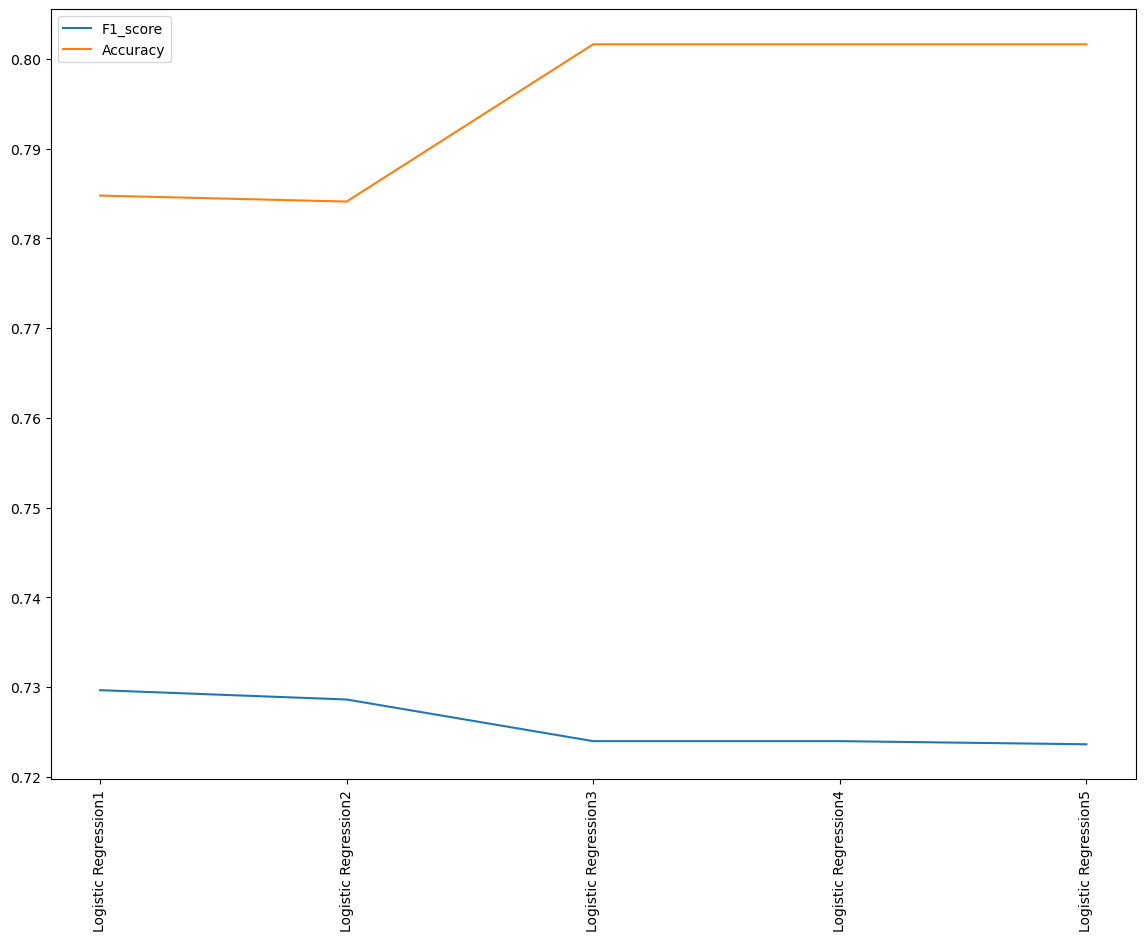

In [74]:
import matplotlib
model = []
for i in range(len(scores_df['model'])):
    model.append(scores_df['model'][i])

matplotlib.rcParams['figure.figsize'] = (14,10)
scores_df[['F1_score','Accuracy']].plot()
plt.xticks(np.arange(len(scores_df['model'])), model, rotation='vertical')
plt.show()

After careful observations we can conclude from the above graph that ['Logistic Regression1': {'model__C': 10, 'model__class_weight': {'Yes': 1.5, 'No': 1.0}, 'model__solver': 'liblinear'}] provided more stable F1-Score and Accuracy Score whereas parameter for getting high Accuracy Score is ['Logistic Regression4	': {'model__C': 10, 'model__solver': 'lbfgs'] 